<a href="https://colab.research.google.com/github/Shubhampanaskar/Hotel-Booking-Analysis-Capstone/blob/main/Hotel_Booking_Analysis_BY_SHUBHAM_PANASKAR_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Loading data set and storing it in data frame.
df=pd.read_csv("/content/Hotel Bookings.csv") 

In [ ]:
# Printing First 5 rows of data frame 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Printing Last 5 rows of data frame 
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Droping Duplicate Values
df.drop_duplicates(inplace=True)

In [ ]:
# Printing shape of dataframe
df.shape

(87396, 32)

In [ ]:
# List of columns present in dataframe 
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Basic Information Of Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# To check Data Type
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why



In [ ]:
# Checking for total null values in each column
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# Percentage of null values in each column
Percentage =print(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False))


company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

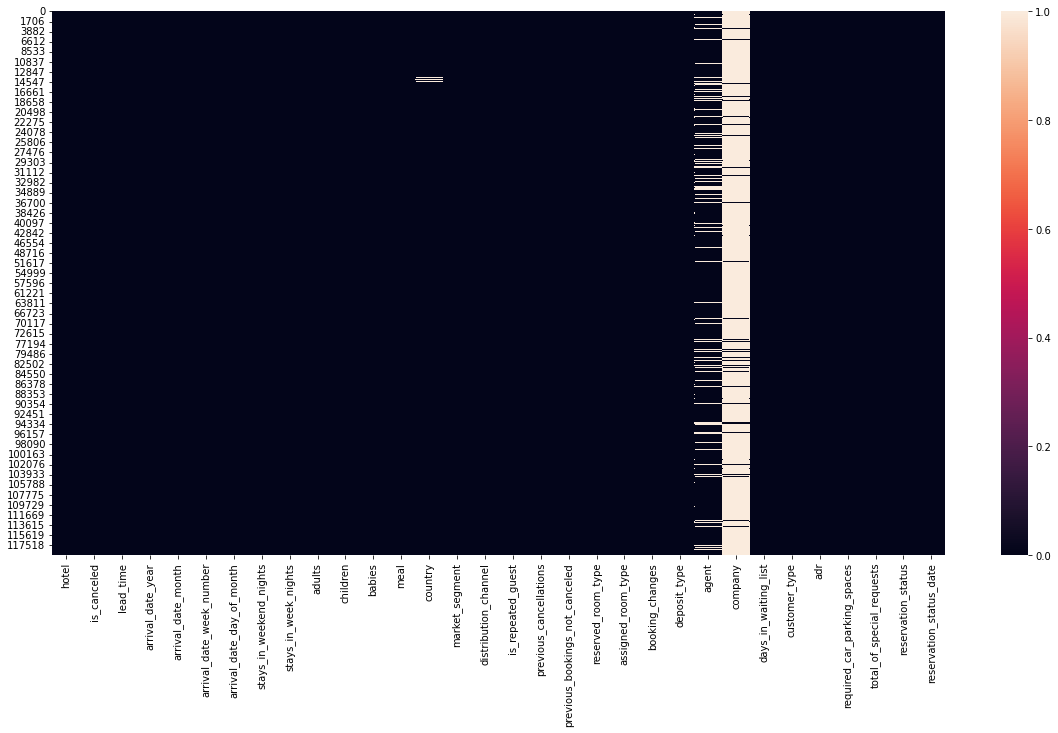

In [ ]:
# Plotting Heat map of null values 
fig,axes=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.isna())
plt.show()

## Conclusion:

# 1. There are four columns which contains null values are Country, agent, company and children.

# 2. Approx 94% of Company column is filled with null values.
 

In [ ]:
# Before Handling null values first create a copy of original data set.
hotel_df=df.copy() 
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Columns like Agent and Company have maximum number of null values as compared to other columns and we will replace all null values with 0, because these are not missing values instead they will be considered as "Not Applicable".

In [ ]:
# Let's handle null values 
# Replacing null values of column Agent and Company with 0.
hotel_df[['agent','company']]=hotel_df[['agent','company']].fillna(0.0)

## We will replace all missing values of column 'children' with rounded mean value as it contains the count of children.

In [ ]:
# Replacing missing children values with rounded mean value
hotel_df['children'].fillna(round(df['children'].mean()),inplace=True)

## Now, we will replace NULL values of 'country' column with mode of that column.

In [ ]:
# Replacing missing values of country column with mode of that column 
hotel_df['country'].fillna(df['country'].mode().to_string(),inplace=True)

## Let's explore some columns.


In [ ]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
hotel_df['customer_type'].value_counts()

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

In [ ]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel_df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
hotel_df['adults'].value_counts()

2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
hotel_df['children'].value_counts()

0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [ ]:
hotel_df['babies'].value_counts()

0     86482
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

# There are many rows that have zero guests including adults, children and babies, we need to remove those rows because they do not make any sense.

In [ ]:
# Drop those rows which have adult, babies and children equals to 0

hotel_df = hotel_df.drop(df[(hotel_df.adults + hotel_df.babies + hotel_df.children)==0].index)

In [ ]:
# Let's now check the shape of dataframe

hotel_df.shape

(87230, 32)

In [ ]:
# Descriptive statistics of dataset

hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


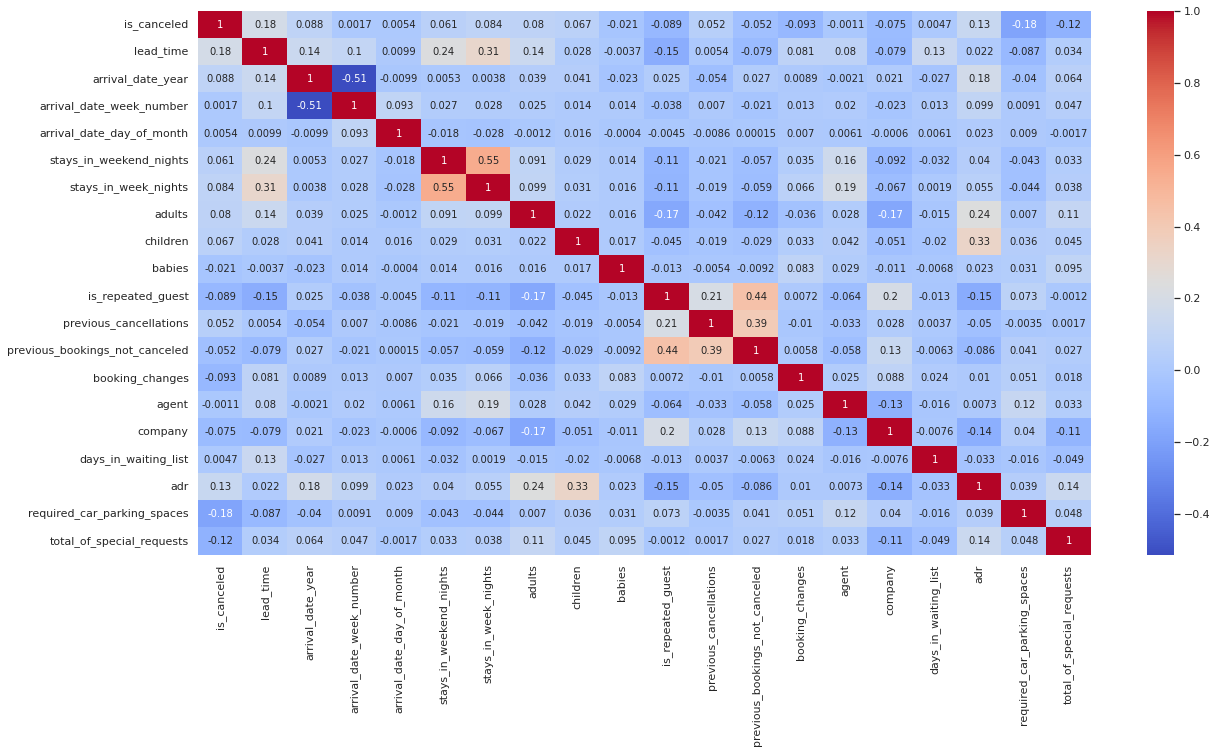

In [ ]:
# Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(hotel_df.corr(), cmap="coolwarm", annot=True)

## From the above correlation heatmap it is clear that 'is_canceled' is highly positively correlated with 'lead_time' as compared to other features.

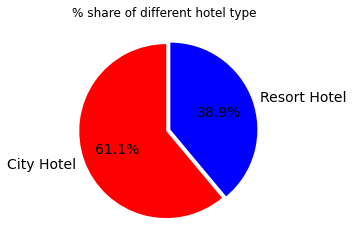

In [ ]:
# Pie plot to show types of hotels.

labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.title('% share of different hotel type ')
plt.show()

# City Hotels are most preferred hotel by guests. Thus city hotels has maximum bookings.


## 1. How many booking were cancelled in both type of hotels ?

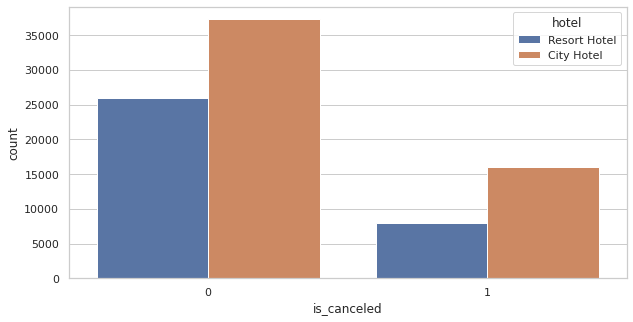

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=hotel_df)

## In Resort hotel, booking cancellation is less as compared  to City hotel. And overall booking cancellation is low.

## 2. Which month is the most occupied and which is the least occupied?

In [ ]:
# value_counts counts the number of times each values has appeared

(hotel_df.arrival_date_month.value_counts(normalize=True))*100

August       12.887768
July         11.513241
May           9.565516
April         9.056517
June          8.891436
March         8.585349
October       7.934197
September     7.660209
February      6.973518
December      5.860369
November      5.701020
January       5.370859
Name: arrival_date_month, dtype: float64

In [ ]:
month_df = hotel_df[hotel_df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,7620
1,July,6847
2,May,5902
3,March,5660
4,April,5494
5,June,5403
6,October,5279
7,September,5041
8,February,4671
9,November,3921


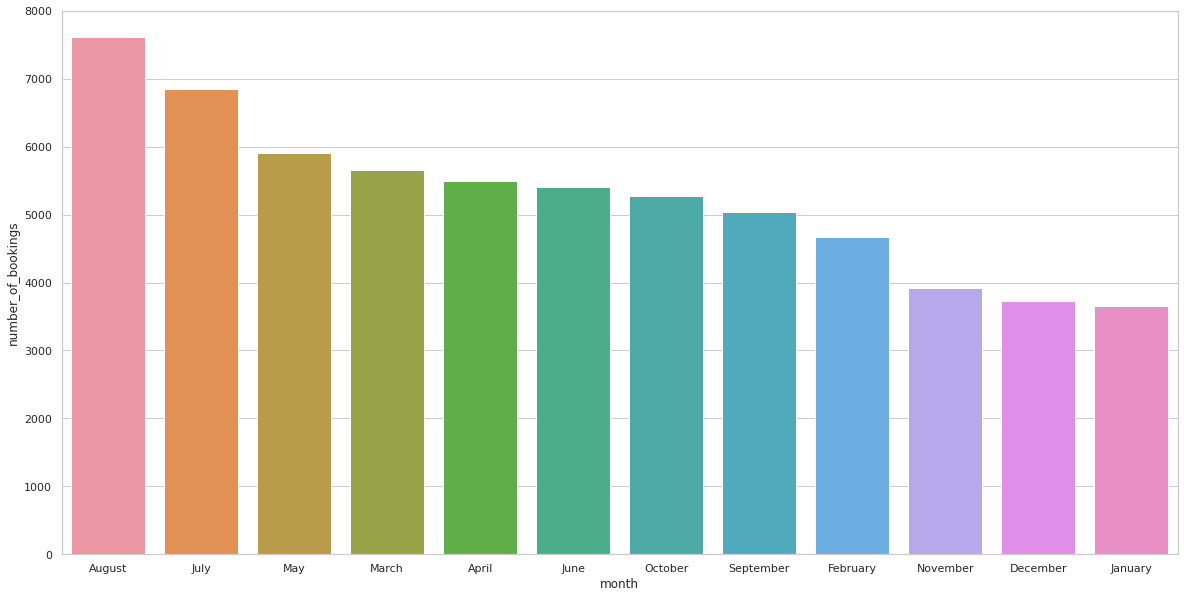

In [ ]:
# Barplot of number of bookings in each month

plt.figure(figsize=(20,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In [ ]:
month_hotel_type = hotel_df[hotel_df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,3325,2169
August,4467,3153
December,2019,1716
February,2618,2053
January,1961,1687
July,3834,3013
June,3477,1926
March,3469,2191
May,3656,2246


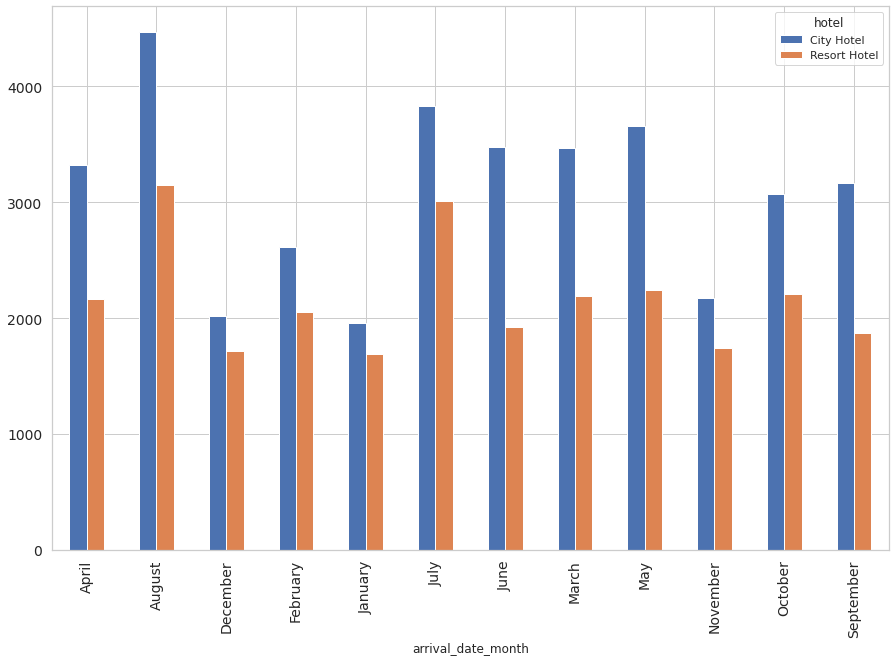

In [ ]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

## August is the most occupied month with 11.62% bookings and January is the least occupied month with 4.94% bookings. 


# 3.From which countries maximum number of gusts are coming?


In [ ]:
# Value count of top 10 countries from where maximum number of bookings happened

Top_10_countries= hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:10]
Top_10_countries= Top_10_countries.reset_index().rename(columns={'index':'country','country':'number of bookings'})
Top_10_countries['percentage']=(Top_10_countries['number of bookings']/Top_10_countries['number of bookings'].sum())*100
Top_10_countries



,country,number of bookings,percentage
0,PRT,17573,33.929295
1,GBR,8440,16.295638
2,FRA,7091,13.691039
3,ESP,5382,10.391366
4,DEU,4332,8.364065
5,IRL,2347,4.531500
6,ITA,1986,3.834495
7,BEL,1670,3.224374
8,NLD,1560,3.011990
9,USA,1412,2.726237


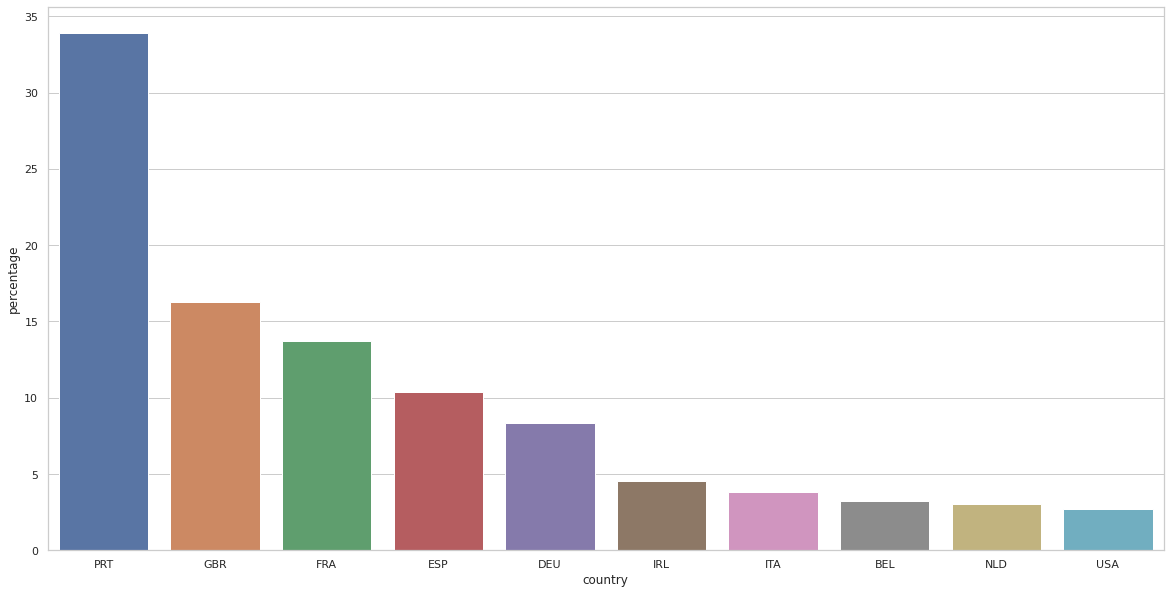

In [ ]:
# Bar plot of Top_10_countries 
plt.figure(figsize=(20,10))
Bar_plot=sns.barplot(x='country',y='percentage',data=Top_10_countries)


## More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest. Maximum from Portugal and Minimum from United States Of America  

#4. What are the number of weekend vs weekdays night bookings for resort hotels?

In [ ]:
# We will take only not cancelled booking values
Not_cancelled =hotel_df[hotel_df['is_canceled']==0]
Not_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Total number of week night stay.
Week_night_stay=Not_cancelled[Not_cancelled['hotel']=='Resort Hotel']['stays_in_week_nights'].sum()

In [ ]:
# Total number of weekend night stays.
Weekend_night_stay=Not_cancelled[Not_cancelled['hotel']=='Resort Hotel']['stays_in_weekend_nights'].sum()


Text(0.5, 1.0, 'Barplot for week night stay and weekend night stays in Resort type hotels')

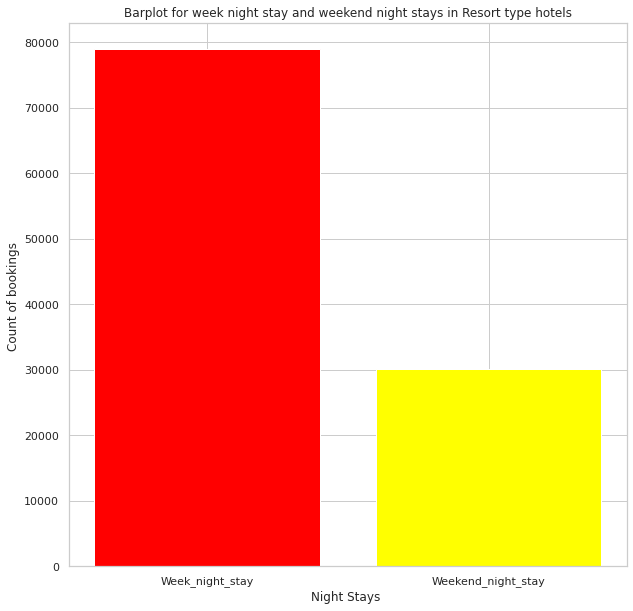

In [ ]:
# Barplot for week night stay and weekend night stays in Resort type hotels.
plt.figure(figsize=(10,10))
plt.bar(x=['Week_night_stay','Weekend_night_stay'],height=[Week_night_stay,Weekend_night_stay],color=['red','yellow'])
plt.xlabel('Night Stays ')
plt.ylabel('Count of bookings ')
plt.title('Barplot for week night stay and weekend night stays in Resort type hotels')

# In Resort type hotels Maximum stays in week nights 

# 5. Which months have cheaper booking rates?

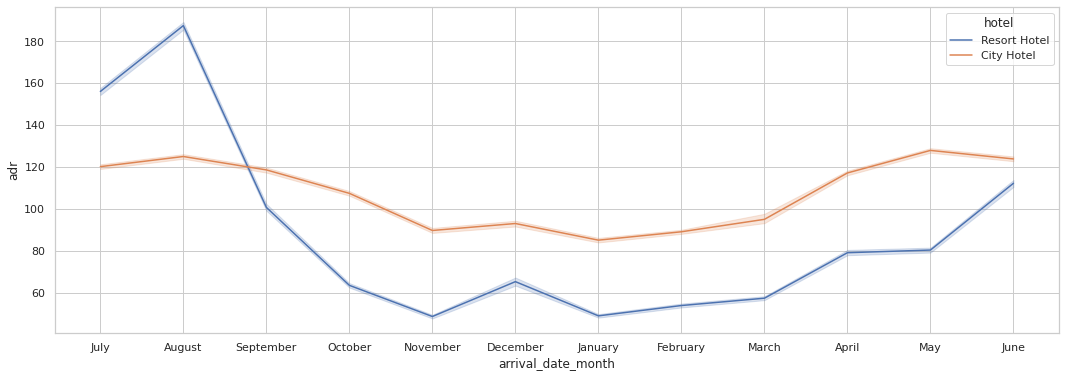

In [ ]:
# Line plot of adr for different hotel types.
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=hotel_df)
plt.show()

## For both city and resort hotels, November to January have cheaper average daily rates.

## 6. No of customers repeated their bookings.

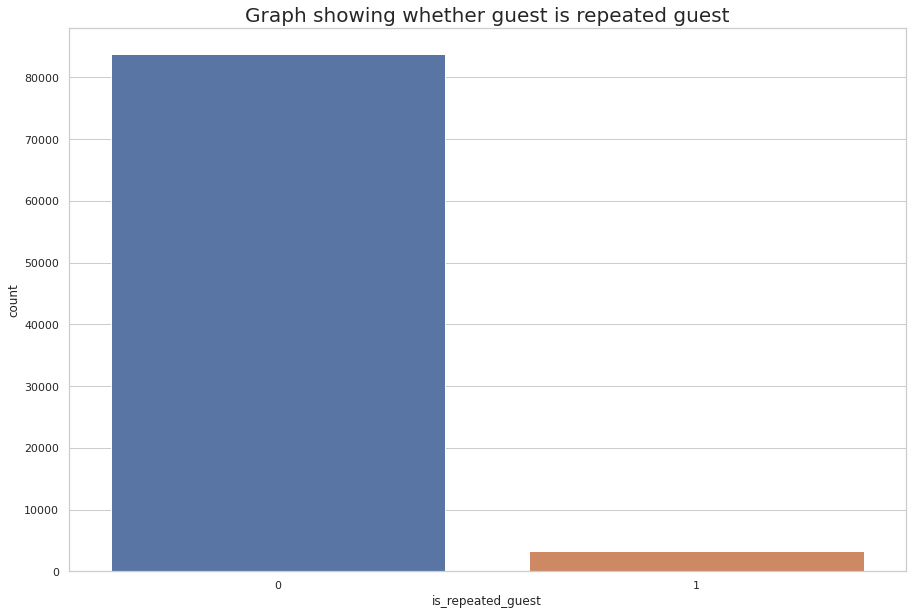

In [ ]:
# Countplot of number of customers repeated their bookings.
plt.figure(figsize=(15,10))
sns.countplot(data= hotel_df , x='is_repeated_guest' ).set_title('Graph showing whether guest is repeated guest',fontsize=20)
plt.show()

# From the above plot it is clear that most customer not repeating their booking.
# It is clear that number of repeating guests are very low. 


# 7. Most booked accomodation type

## **We will going to check whether the booking was made for an individual or a couple or a family(A couple is a group of 2 adults and family contains people more than 2).**

In [ ]:
# Filter the data on the basis of individual,couple and family.
individual=hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==1) & (hotel_df['children']==0) & (hotel_df['babies']==0)]
couple=hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==2) & (hotel_df['children']==0) & (hotel_df['babies']==0)]
family=hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']) + (hotel_df['children']) + (hotel_df['babies']) > 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
# Shape of dataset containing only not cancelled bookings.

total_count = hotel_df[(hotel_df['is_canceled']==0)].shape[0]

In [ ]:
# Calculating the percentage of booking of each type of accomodations.

percentage=[round(len(item)/total_count * 100) for item in [individual,couple,family] ]

In [ ]:
types_of_accomodation=['individual','couple','family']

In [ ]:
# Dictionary to store types of accomodation and their percentage of bookings.

dict(zip(types_of_accomodation,percentage))

{'individual': 21, 'couple': 64, 'family': 15}

In [ ]:
# Creating data frame

data=pd.DataFrame({'types_of_accomodation':types_of_accomodation,'percentage':percentage})
data

,types_of_accomodation,percentage
0,individual,21
1,couple,64
2,family,15


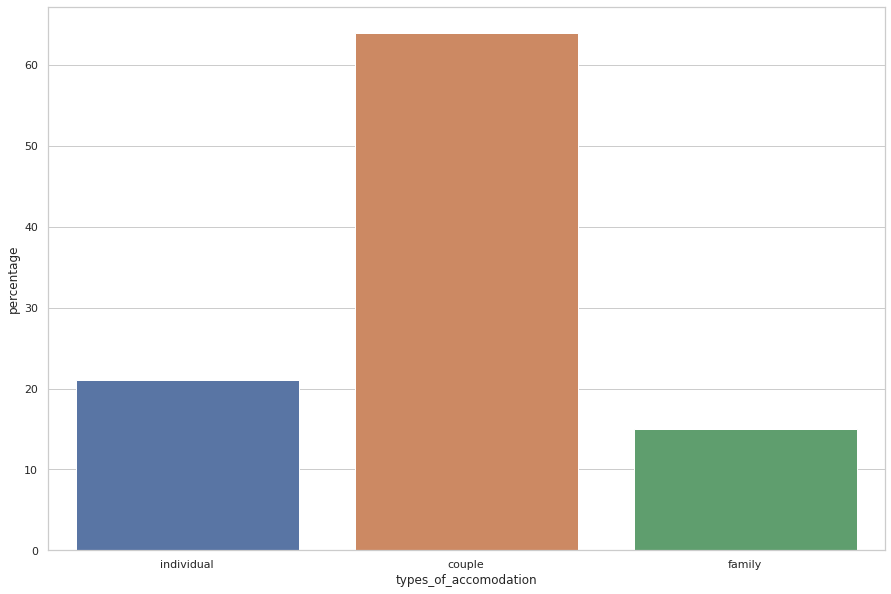

In [ ]:
# Barplot of different types of accomodation 
plt.figure(figsize=(15,10))
sns.barplot(x='types_of_accomodation',y='percentage',data=data)

# Percentage of booking is high in case of 'Couple', which means maximum number of booking made by couples in both type of hotels.

# 8.Number of bookings made by different market segments.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


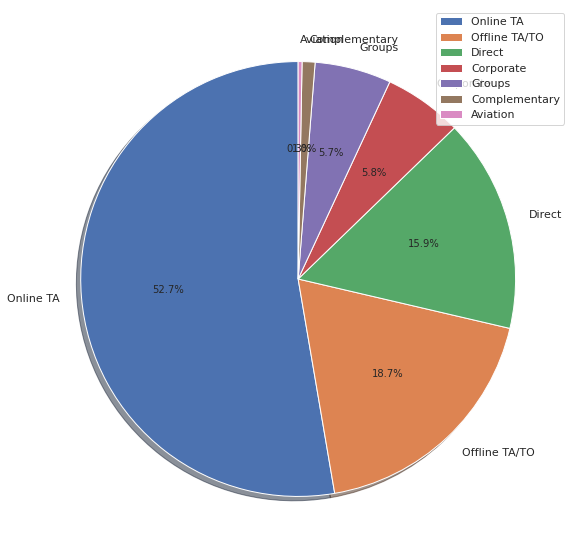

In [ ]:
plt.figure(figsize=(20,10))
segment=Not_cancelled["market_segment"].value_counts()

# pie plot

pie_plot= plt.pie(segment,
                  labels=segment.index,
                  autopct='%1.1f%%',
                  shadow=True, 
                  startangle=90
                   )
plt.legend(pie_plot, labels = segment.index, loc="best")


## Maximum number of bookings made by Online TA, followed by Offline TA and Direct.

# 9.How does lead time affect the cancellation ?

Text(0, 0.5, 'Cancelations [%]')

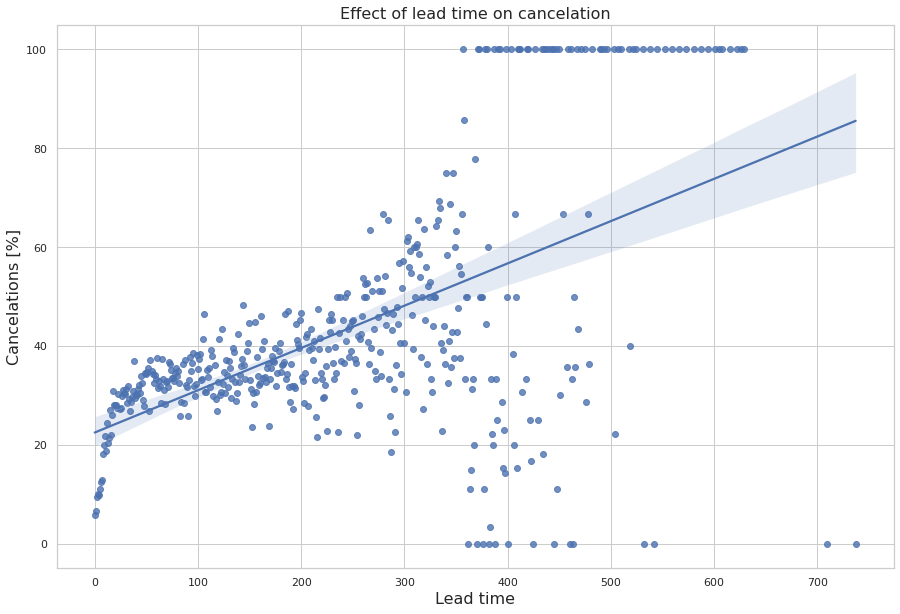

In [ ]:
# Regplot showing relation between lead time and cancellation
lead_time_df=hotel_df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(15, 10))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)


## From above plot it is clear that as lead time increases,percentage of booking cancellation also increases.

# 10. How does deposit type affects cancelation?

Text(0, 0.5, 'Cancelations [%]')

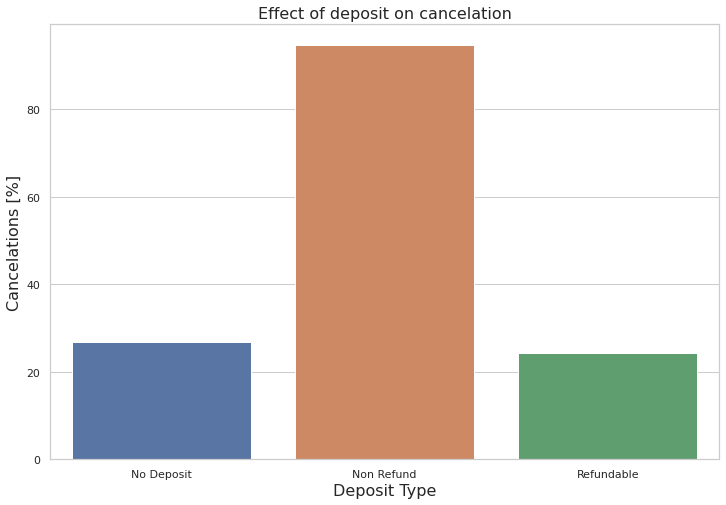

In [ ]:
deposit_df = hotel_df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

## 'Non-Refund' deposit type increases the number of booking cancellations.

# 11. Which is Most demandding Meal Type ?

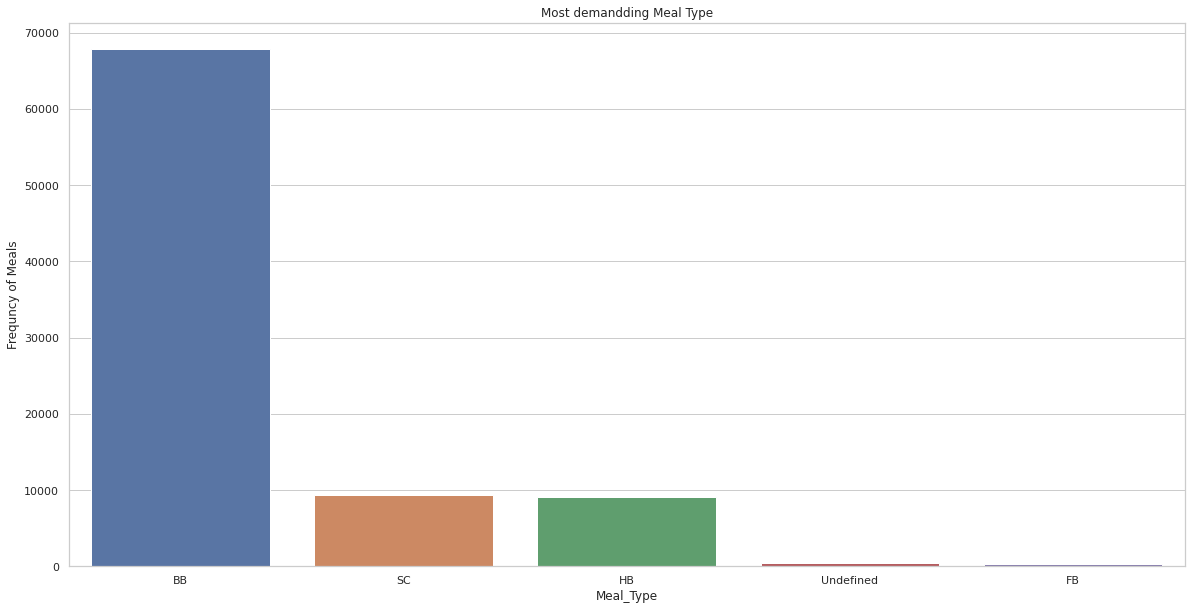

In [ ]:
Most_Preferred_meal=hotel_df['meal'].value_counts().reset_index().rename(columns={'index':'Meal_Type','meal':'Frequncy of Meals'})
Most_Preferred_meal
plt.figure(figsize=(20,10))
plt.title('Most demandding Meal Type')
ax = sns.barplot(x="Meal_Type", y="Frequncy of Meals", data =Most_Preferred_meal )

Types of meal in hotels:
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)


# The above Bar Graph plot shows that ‘Bread and Breakfast’ was the most ordered meal type.
 



#12. Which is the most preferred room type by the customers?

Text(0.5, 1.0, 'Most preferred Room type')

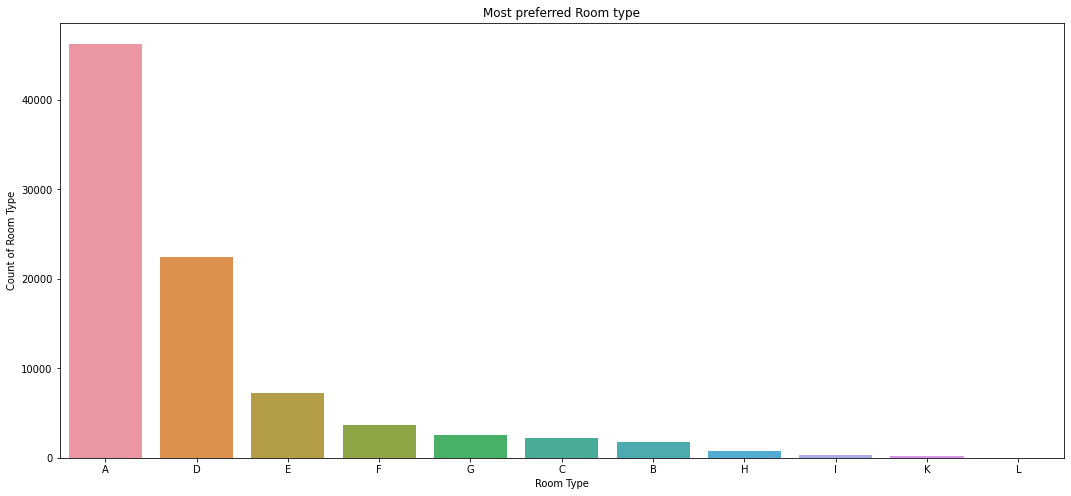

In [ ]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=hotel_df['assigned_room_type'],order=hotel_df['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

#So the most preferred Room type is "A".

# 13. Which Hotels has the most repeated guests?

Text(0.5, 1.0, 'Most repeated guests for each hotel')

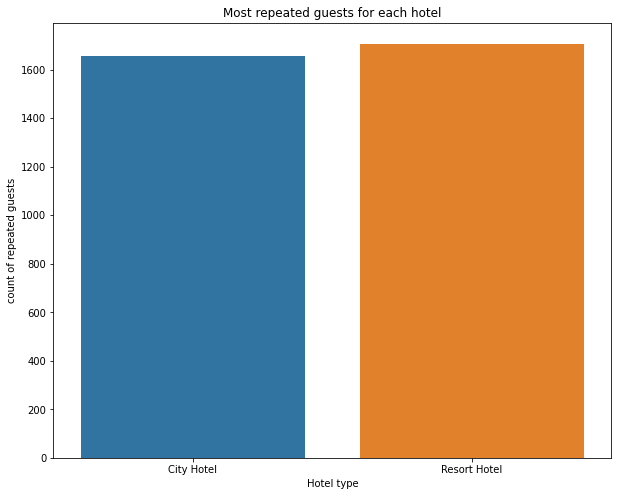

In [ ]:
repeated_guests_df=hotel_df[hotel_df['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})


plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])


plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

#Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.
